# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

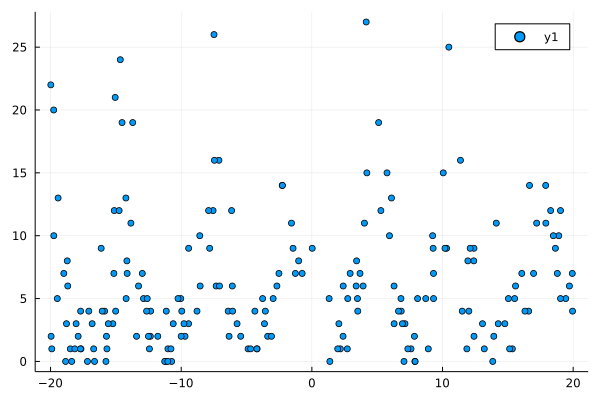

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -572.8630738747178
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.930673 seconds (6.19 M allocations: 409.288 MiB, 2.47% gc time, 97.18% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.27540199255890896, 0.21850653123501035, 0.2083249900078094, 0.6556226330377178, 0.3914300374589865, 0.17874580188764647, 0.3360197152347302, 0.31880493396876997, 0.34272773669040874, 0.46468426319123285  …  0.19117806576563162, 0.49967969674207646, 0.3613494961555051, 0.47836850606339665, 0.23627951999115804, 0.1925436773294692, 0.45290554458060484, 0.17390345376708283, 0.3968820165954481, 0.24952992897146417], θ = [5.962362313261236, 5.478220806324982, 3.4873965656071984, 2.896966296628691, 2.962273561155413, 3.490710909579116, 2.9720877999889153, 4.462269711700881, 3.9613004103052387, 2.9471578691435347  …  4.486344014352081, 4.408650218684966, 5.935554625738518, 10.304246462628829, 4.479180717854649, 4.984609941617361, 7.865999048941751, 5.984924385037764, 9.377233754365713, 3.481951690717847]), opt_state = (NamedTuple(),), hyperopt_state = (N

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -686.7068819967653
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.117497 seconds (4.22 M allocations: 314.009 MiB, 95.99% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 13.45325492845912) infered by Analytic Variational Inference , (local_vars = (c = [0.1805777212948799, 0.15209671292989385, 0.17707692896627172, 0.8264350968384532, 0.5889228952901183, 0.2565244390288911, 0.5291656215683399, 0.5021098672543537, 0.49880314669344306, 0.6534509415494737  …  0.3180840359542268, 0.6855341998919728, 0.29057215869687575, 0.4528405843033922, 0.4030093821908006, 0.24433948744921247, 0.4167979217645797, 0.20677698467040864, 0.32729765377085795, 0.41967285252976444], θ = [6.621467958454167, 6.3329814425094915, 4.428353984857417, 4.868499987935086, 4.635894639039926, 4.657353381346409, 4.580844593122627, 5.999835208471275, 5.454027622458916, 4.700526547182121  …  5.771820835581181, 6.172413985862299, 6.428299937661852, 10.459776172362666, 5.8917012121366685, 6.103714131040983, 8.10925608845861, 7.055976417415309, 9.796623183903636, 4.927421325540458], γ = [6.278902191890477, 6.690370718760531, 6.87983863

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

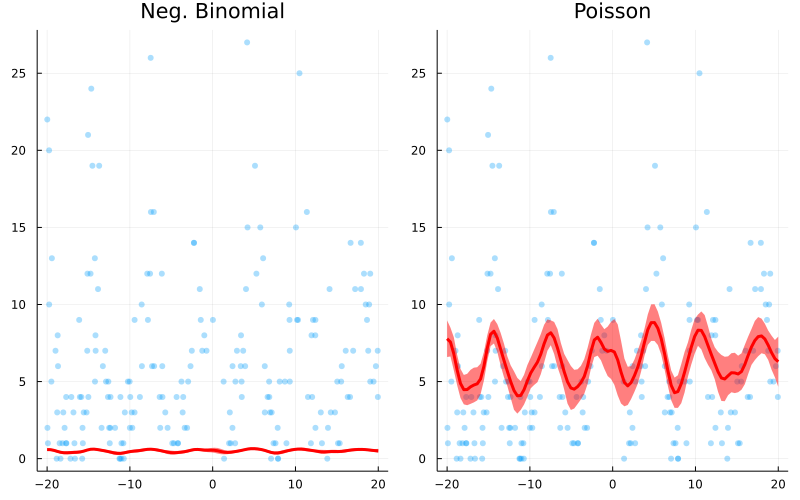

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*